In [1]:
from utils import BaselineClassifier, evaluate, nn_accuracy, run
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from tqdm.notebook import tqdm
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
results = []

In [5]:
ns = [5000, 10000, 30000, 50000, 100000]

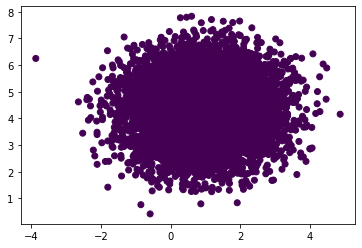

In [6]:
X_show, y_show = make_blobs(n_samples=10000, n_features=20, centers=1, cluster_std=1.0, shuffle=True, random_state=0)
plt.scatter(X_show[:, 0], X_show[:, 1], c=y_show)
plt.savefig('figures/uniform_example.png')

In [ ]:
for n in tqdm(ns):
    results = []
    for seed in tqdm(range(5)):
        k = int(n/1000)
        result, _ = run(n_samples=n, n_features=20, n_clusters=20, cluster_std=1.5, k=k, n_test=100, random_seed=seed, kd_tree=True)
        results.append(result)
    hdr = False  if os.path.isfile('samples_clusters_kd_tree_original.csv') else True
    pd.DataFrame(results).to_csv(f'samples_clusters_kd_tree_original.csv', mode='a', header=hdr)